In [1]:
include("DynamicalShiftedFock/DynamicalShiftedFock.jl")
using .DynamicalShiftedFock
using .DynamicalShiftedFock: solve, Tsit5

include("../CairoMakie.jl")

In [12]:
N_full = 40

Δ = 0.1
U = 0.01
F = 2
γ = 1

a_full = destroy(N_full)

H_full = Δ * a_full' * a_full + F * (a_full' + a_full) + U * (a_full^2)' * a_full^2
c_ops_full = [sqrt(γ) * a_full]
e_ops_full = [a_full' * a_full]

L_full = liouvillian(H_full, c_ops_full)

1600×1600 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 9360 stored entries:
⎡⢿⣿⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠙⢿⣿⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠙⢿⣿⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠙⢿⣿⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⢤⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢿⣷⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣷⣤⡀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣄⡀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣄⡀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣄⡀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⎦

In [13]:
tlist = range(0, 10, 100)
ψ0_full = fock(N_full, 0)

prob_full = mesolveProblem(L_full, ψ0_full, tlist, e_ops=e_ops_full)
sol_full = solve(prob_full, Tsit5())

retcode: Success
Interpolation: 1st order linear
t: 1-element Vector{Float64}:
 10.0
u: 1-element Vector{Vector{ComplexF64}}:
 [4.990160901123306e-6 - 9.203777559944602e-17im, -7.742721903904109e-6 - 1.6377703702997948e-5im, -2.873816173474857e-5 + 3.596351853315798e-5im, 9.255818794715563e-5 + 1.9349727619225445e-5im, -4.519861924755391e-5 - 0.00016027310057850714im, -0.0001867093538979396 + 0.0001804832566752535im, 0.0003500316880478836 + 0.000106899263004986im, -0.00010396626520994256 - 0.0004612488791866921im, -0.00041327381229991497 + 0.00038633695157667264im, 0.0006077492961315804 + 0.00017300770571554395im  …  -6.567611692342683e-9 + 7.862827666241412e-10im, 5.280472229325359e-9 + 1.495520355671114e-11im, -4.08390316154748e-9 + 7.8726009284602e-12im, 2.8539685098788726e-9 + 3.147936460921917e-10im, -2.236410969462109e-9 + 1.2989002544563484e-11im, 1.2064147733779597e-9 + 8.171495964702503e-11im, -1.0531259544310043e-9 + 5.131067121414737e-11im, 3.6419304601817846e-10 - 1.2496990

In [14]:
N = 3
a = destroy(N)
function H_dsf(op_l, p)
    Δ = p.Δ
    U = p.U
    F = p.F
    γ = p.γ
    a = op_l[1]

    return Δ * a' * a + F * (a' + a) + U * (a^2)' * a^2
end

function c_ops_dsf(op_l, p)
    γ = p.γ
    a = op_l[1]

    return [sqrt(γ) * a]
end

function e_ops_dsf(op_l, p)
    a = op_l[1]

    return [a' * a]
end

op_l = [a]
α0_l = [0.0]
dsf_params = (Δ=Δ, U = U, F=F, γ=γ)

(Δ = 0.1, U = 0.01, F = 2, γ = 1)

In [15]:
ψ0 = fock(N, 0)

prob = dsf_mesolveProblem(H_dsf, ψ0, tlist, c_ops_dsf, op_l, α0_l, dsf_params, e_ops=e_ops_dsf)

sol = solve(prob, Tsit5())

retcode: Success
Interpolation: 1st order linear
t: 1-element Vector{Float64}:
 10.0
u: 1-element Vector{Vector{ComplexF64}}:
 [0.9644596784497929 + 7.105653770319082e-19im, 0.005622423137728001 + 0.060908447295111696im, 0.08742604003859862 - 0.04281084113199909im, 0.005622423137728001 - 0.06090844729511172im, 0.025262038461802448 - 1.2563543771433512e-19im, -0.0035006184449855706 - 0.004367209109257501im, 0.08742604003859862 + 0.04281084113199909im, -0.0035006184449855693 + 0.0043672091092574975im, 0.010278283088405223 - 7.1586580131932235e-19im]

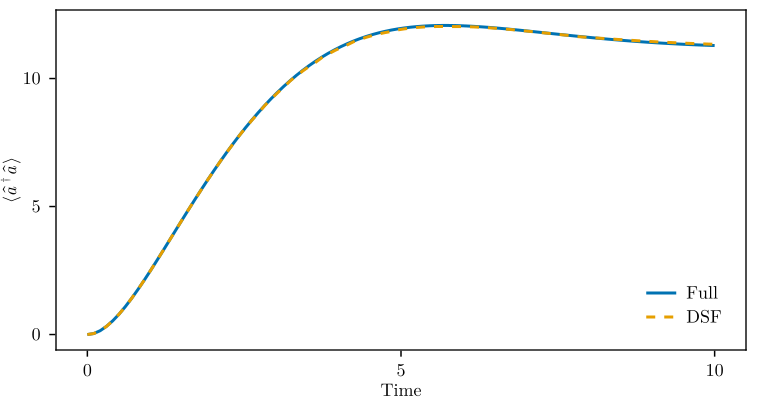

In [18]:
fig = Figure()
ax = Axis(fig[1, 1]; xlabel="Time", ylabel=L"\langle \hat{a}^\dagger \hat{a} \rangle")

lines!(ax, tlist, real(sol_full.prob.p.expvals[1,:]), label="Full")
lines!(ax, tlist, real(sol.prob.p.expvals[1,:]), linestyle=:dash, label="DSF")

axislegend(ax, position=:rb)

fig